# Package Imported

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import math
from termcolor import colored as cl

# Machine Learning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from __future__ import print_function, division

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import export_graphviz
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Liquid
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.set_style("white")
%matplotlib inline

# Data Visualization & Analysis

In [2]:
df_original = pd.read_csv(r'C:\Users\Jason\Desktop\MATH3710 Midterm\12.农　业\12-3 Gross Output Value of Agriculture, Forestry, Animal Husbandry (Region).csv')
df_original.head(10)

,Region,Region_CN,Gross Output Value(100 million yuan),Farming,Forestry,Animal Husbandry,Fishery,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,Beijing,北京,281.7,102.3,115.6,49.3,5.3,93.7,89.2,121.6,63.5,86.2
1,Tianjin,天津,414.4,202.9,24.9,100.4,71.4,100.6,103.2,195.8,83.5,97.9
2,Hebei,河北,6061.5,3114.9,231.4,2035.4,212.5,101.9,101.7,104.8,100.4,100.6
3,Shanxi,山西,1626.5,936.8,101.3,478.6,6.9,102.0,102.5,102.2,100.7,100.2
4,Neimenggu,内蒙古,3176.3,1606.3,100.9,1390.5,27.8,102.1,103.4,101.0,100.9,93.3
5,Liaoning,辽宁,4368.2,1912.0,117.4,1479.5,669.6,103.0,105.6,85.3,101.4,104.5
6,Jilin,吉林,2442.7,1014.1,68.1,1239.6,40.1,102.3,105.5,94.5,99.7,102.7
7,Heilongjiang,黑龙江,5930.0,3774.5,193.9,1671.8,123.1,102.5,102.5,105.1,101.7,103.9
8,Shanghai,上海,284.8,145.8,18.3,48.2,55.0,92.7,92.2,111.4,80.9,100.1
9,Jiangsu,江苏,7503.2,3828.6,162.0,1213.0,1741.0,100.7,102.8,105.2,92.3,99.3


### Basic Information 

In [3]:
print(cl(df_original[['Forestry.1','Animal Husbandry.1','Fishery.1','Farming.1']].describe(), attrs=['bold']))

       Forestry.1  Animal Husbandry.1   Fishery.1   Farming.1
count   31.000000           31.000000   31.000000   31.000000
mean   108.754839           96.603226  101.764516  103.809677
std     17.424003            8.235795    4.994767    3.923634
min     85.300000           63.500000   86.200000   89.200000
25%    103.200000           94.800000  100.150000  103.150000
50%    105.300000           98.200000  102.900000  104.000000
75%    109.400000          100.800000  104.400000  105.550000
max    195.800000          109.000000  109.900000  108.700000


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Region                                        31 non-null     object 
 1   Region_CN                                     31 non-null     object 
 2   Gross Output Value(100 million yuan)          31 non-null     float64
 3   Farming                                       31 non-null     float64
 4   Forestry                                      31 non-null     float64
 5   Animal Husbandry                              31 non-null     float64
 6   Fishery                                       31 non-null     float64
 7   Indices of Gross Output (preceding year=100)  31 non-null     float64
 8   Farming.1                                     31 non-null     float64
 9   Forestry.1                                    31 non-null     float

In [5]:
df_original.isnull().sum()  # there is no null value

Region                                          0
Region_CN                                       0
Gross Output Value(100 million yuan)            0
Farming                                         0
Forestry                                        0
Animal Husbandry                                0
Fishery                                         0
Indices of Gross Output (preceding year=100)    0
Farming.1                                       0
Forestry.1                                      0
Animal Husbandry.1                              0
Fishery.1                                       0
dtype: int64

#### Dividing groups
Since China has divided each province into six regions, namely (Only list what we have from the dataset)

1. North China: Beijing, Tianjin, Hebei, Shanxi, Inner Mongolia.

2. Northeast region: Liaoning Province, Jilin Province, Heilongjiang Province.

3. East China: Shanghai, Jiangsu, Zhejiang, Anhui, Fujian, Jiangxi, Shandong.

4. Central South Region: Henan Province, Hubei Province, Hunan Province, Guangdong Province, Guangxi Province, Hainan Province.

5. Southwest region: Chongqing, Sichuan, Guizhou, Yunnan and Tibet.

6. Northwest region: Xinjiang Uygur Autonomous Region, Qinghai Province, Gansu Province, Ningxia Hui Autonomous Region, Shaanxi Province.

Here is the thinking: using Farming, Forestry, Animal Husbandry, and Fishery as features to train the model, six regions as six classes, then train the model using machines learning skills.To find out difference between regions.

So, we will map the feature of region into six classes, code will be shown.

In [6]:
# Classes_Mapping
region_mapping = {  
            'Beijing': 1,
            'Tianjin': 1,
            'Hebei': 1,
            'Shanxi': 1,
            'Neimenggu': 1,   
            'Liaoning': 2,
            'Jilin': 2,
            'Heilongjiang': 2,  
            'Shanghai': 3,
            'Jiangsu': 3,
            'Zhejiang': 3,
            'Anhui': 3,
            'Fujian': 3,
            'Jiangxi': 3,
            'Shandong': 3,
            'Henan': 4,
            'Hubei': 4,
            'Hunan': 4,
            'Guangxi': 4, 
            'Guangdong': 4, 
            'Hainan': 4,
            'Chongqin': 5,
            'Sichuan': 5,
            'Guizhou': 5,
            'Yunnan': 5,
            'Xizang': 5,
            'Shanxi_': 6,
            'Gansu': 6,
            'Qinghai': 6,
            'Ningxia': 6,
            'Xinjiang': 6}  
df_original['Region'] = df_original['Region'].map(region_mapping)
df_original

,Region,Region_CN,Gross Output Value(100 million yuan),Farming,Forestry,Animal Husbandry,Fishery,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,北京,281.7,102.3,115.6,49.3,5.3,93.7,89.2,121.6,63.5,86.2
1,1,天津,414.4,202.9,24.9,100.4,71.4,100.6,103.2,195.8,83.5,97.9
2,1,河北,6061.5,3114.9,231.4,2035.4,212.5,101.9,101.7,104.8,100.4,100.6
3,1,山西,1626.5,936.8,101.3,478.6,6.9,102.0,102.5,102.2,100.7,100.2
4,1,内蒙古,3176.3,1606.3,100.9,1390.5,27.8,102.1,103.4,101.0,100.9,93.3
5,2,辽宁,4368.2,1912.0,117.4,1479.5,669.6,103.0,105.6,85.3,101.4,104.5
6,2,吉林,2442.7,1014.1,68.1,1239.6,40.1,102.3,105.5,94.5,99.7,102.7
7,2,黑龙江,5930.0,3774.5,193.9,1671.8,123.1,102.5,102.5,105.1,101.7,103.9
8,3,上海,284.8,145.8,18.3,48.2,55.0,92.7,92.2,111.4,80.9,100.1
9,3,江苏,7503.2,3828.6,162.0,1213.0,1741.0,100.7,102.8,105.2,92.3,99.3


So, here we have the classes which is the first column.

In [7]:
df_original_c1 = df_original.copy(deep=True) # Copy a new processed dataframe
df_original_c1.head(5)

,Region,Region_CN,Gross Output Value(100 million yuan),Farming,Forestry,Animal Husbandry,Fishery,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,北京,281.7,102.3,115.6,49.3,5.3,93.7,89.2,121.6,63.5,86.2
1,1,天津,414.4,202.9,24.9,100.4,71.4,100.6,103.2,195.8,83.5,97.9
2,1,河北,6061.5,3114.9,231.4,2035.4,212.5,101.9,101.7,104.8,100.4,100.6
3,1,山西,1626.5,936.8,101.3,478.6,6.9,102.0,102.5,102.2,100.7,100.2
4,1,内蒙古,3176.3,1606.3,100.9,1390.5,27.8,102.1,103.4,101.0,100.9,93.3


Choose target Columns

In [8]:
df_original_c1 = df_original_c1[['Region','Indices of Gross Output (preceding year=100)', 
                                 'Farming.1', 'Forestry.1', 'Animal Husbandry.1', 'Fishery.1']] # Choose certain columns
df_original_c5 = df_original_c1.copy(deep=True)
df_original_c1.head(5)

,Region,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,93.7,89.2,121.6,63.5,86.2
1,1,100.6,103.2,195.8,83.5,97.9
2,1,101.9,101.7,104.8,100.4,100.6
3,1,102.0,102.5,102.2,100.7,100.2
4,1,102.1,103.4,101.0,100.9,93.3


Map Region

In [9]:
df_original_c2 = df_original_c1.copy()
# Classes_Mapping
RegionEN_mapping = {  
            1: 'North Region',
            2: 'Northeast Region',
            3: 'East Region',
            4: 'Central South Region',
            5: 'Southwest Region',
            6: 'Northwest region'}  
df_original_c2['Region'] = df_original_c2['Region'].map(RegionEN_mapping)
df_original_c2.head(3)

,Region,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,North Region,93.7,89.2,121.6,63.5,86.2
1,North Region,100.6,103.2,195.8,83.5,97.9
2,North Region,101.9,101.7,104.8,100.4,100.6


### Visualization

In [10]:
# Correlation check
df_corr = df_original_c2.corr()
df_corr

,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
Indices of Gross Output (preceding year=100),1.000000,0.930986,-0.215530,0.840470,0.551712
Farming.1,0.930986,1.000000,-0.183946,0.782347,0.577979
Forestry.1,-0.215530,-0.183946,1.000000,-0.430924,-0.221612
Animal Husbandry.1,0.840470,0.782347,-0.430924,1.000000,0.509655
Fishery.1,0.551712,0.577979,-0.221612,0.509655,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Indices of Gross Output (preceding year=100)'),
  Text(0, 1.5, 'Farming.1'),
  Text(0, 2.5, 'Forestry.1'),
  Text(0, 3.5, 'Animal Husbandry.1'),
  Text(0, 4.5, 'Fishery.1')])

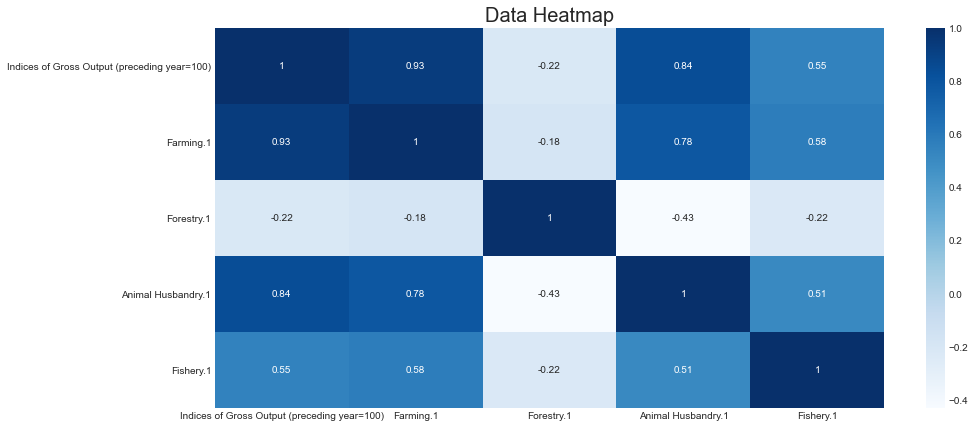

In [11]:
# Correlation Heatmap
plt.rcParams['figure.figsize'] = (15,7)
sns.heatmap(df_corr,cmap='Blues',annot=True, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values)
plt.title("Data Heatmap", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.savefig('_h|eatmap.png')

From the correlation map, we find that the column indices of gross output has a high relavance with farming and animal husbandry, it means that we should better abandon one of the variables, which might influence our model or cause redundancy.

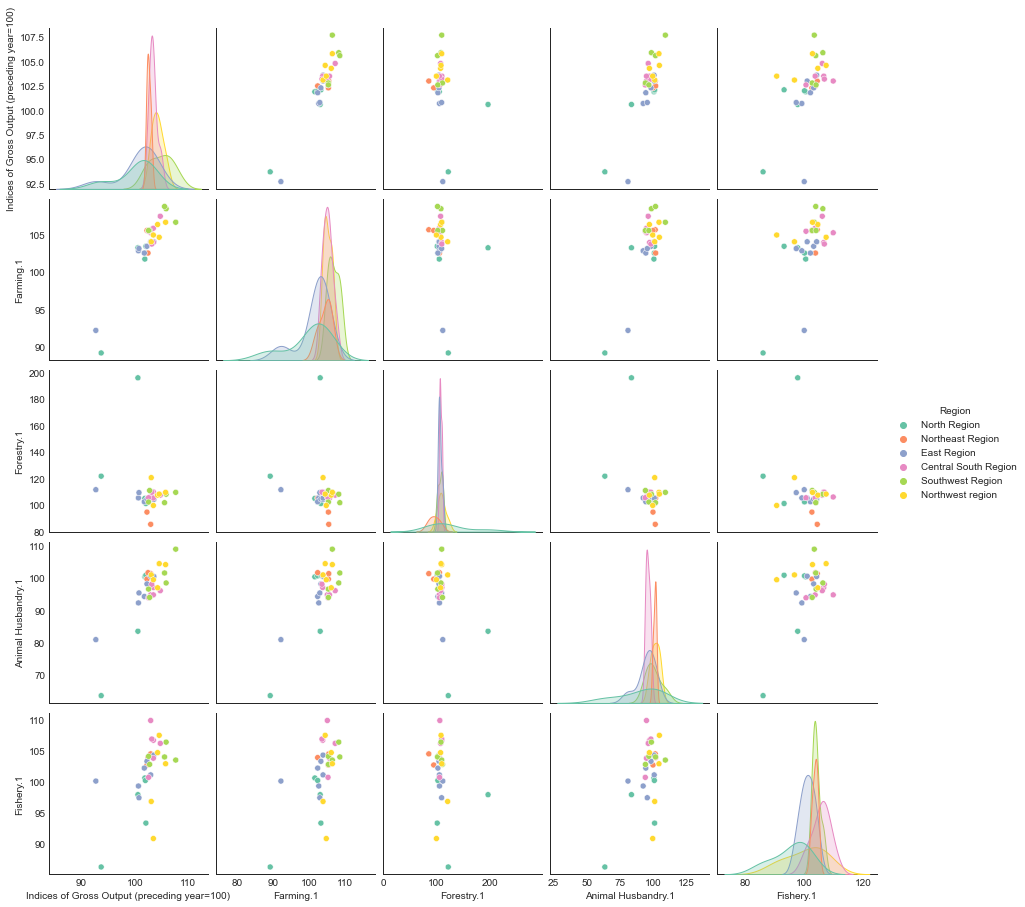

In [12]:
# Creating a pairplot to visualize the similarities and especially difference between the different classes
sns.pairplot(data=df_original_c2, hue='Region', palette='Set2')
# plt.savefig('pairplot2.png')

From the pairplot shown above, we can clearly find that the blue and green points which refers to north and east region always dissociate with the main groups.Some yellow points which refers to Northweat Region also apart from the main groups.

# Machine Learning Modeling

### Data preprocessing

Dump the column Indices of Gross Output as we previously analyzed

In [13]:
df_original_c1 = df_original_c1[['Region','Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1']]
df_original_c1.head(3)

,Region,Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,89.2,121.6,63.5,86.2
1,1,103.2,195.8,83.5,97.9
2,1,101.7,104.8,100.4,100.6


Since there is no null value, so we don't need to fill null value.

We need to normalization the data, since the data is gater around 100. Here we apply min-max normalization, which will make all data in the range of 0-1

In [14]:
# min-max normalization
df_original_c1['Farming.1'] = [(x - min(df_original_c1['Farming.1']))/(max(df_original_c1['Farming.1']) - min(df_original_c1['Farming.1'])) for x in df_original_c1['Farming.1']]
df_original_c1['Forestry.1'] = [(x - min(df_original_c1['Forestry.1']))/(max(df_original_c1['Forestry.1']) - min(df_original_c1['Forestry.1'])) for x in df_original_c1['Forestry.1']]
df_original_c1['Animal Husbandry.1'] = [(x - min(df_original_c1['Animal Husbandry.1']))/(max(df_original_c1['Animal Husbandry.1']) - min(df_original_c1['Animal Husbandry.1'])) for x in df_original_c1['Animal Husbandry.1']]
df_original_c1['Fishery.1'] = [(x - min(df_original_c1['Fishery.1']))/(max(df_original_c1['Fishery.1']) - min(df_original_c1['Fishery.1'])) for x in df_original_c1['Fishery.1']]
df_original_c3 = df_original_c1.copy(deep=True)
df_original_c1.head(5)

,Region,Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,0.000000,0.328507,0.000000,0.000000
1,1,0.717949,1.000000,0.439560,0.493671
2,1,0.641026,0.176471,0.810989,0.607595
3,1,0.682051,0.152941,0.817582,0.590717
4,1,0.728205,0.142081,0.821978,0.299578


Check the Pearson Correlaion of Features after normalizing the data.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

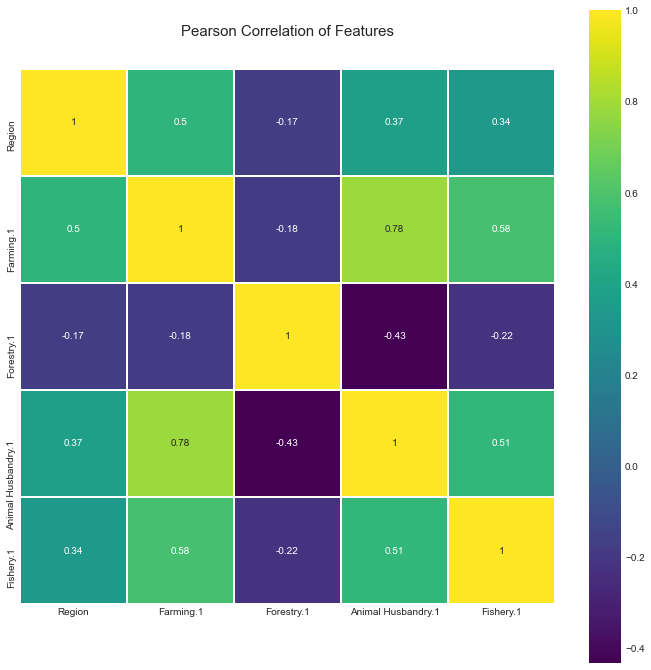

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_original_c1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

This heeatmap is useful for an initial observation, since we can see easily get an idea of predictive value of each feature. After we dump the initial feature indices gross, the correlation values are not so high, so the value is good enough to be features.

Using groupby() to check the relations between features and regions.

In [16]:
df_original_c2[['Region', 'Animal Husbandry.1']].groupby(['Region'], as_index=False).agg(['mean', 'count', 'sum'])

Animal Husbandry.1             
                                   mean count    sum
Region                                              
Central South Region          95.800000     6  574.8
East Region                   94.600000     7  662.2
North Region                  89.800000     5  449.0
Northeast Region             100.933333     3  302.8
Northwest region             101.240000     5  506.2
Southwest Region              99.940000     5  499.7

In [17]:
df_original_c2[['Region', 'Forestry.1']].groupby(['Region'], as_index=False).agg(['mean', 'count', 'sum'])

Forestry.1             
                            mean count    sum
Region                                       
Central South Region  107.133333     6  642.8
East Region           105.942857     7  741.6
North Region          125.080000     5  625.4
Northeast Region       94.966667     3  284.9
Northwest region      108.960000     5  544.8
Southwest Region      106.380000     5  531.9

In [18]:
df_original_c2[['Region', 'Fishery.1']].groupby(['Region'], as_index=False).agg(['mean', 'count', 'sum'])

Fishery.1             
                          mean count    sum
Region                                     
Central South Region    105.70     6  634.2
East Region             101.10     7  707.7
North Region             95.64     5  478.2
Northeast Region        103.70     3  311.1
Northwest region        100.54     5  502.7
Southwest Region        104.16     5  520.8

In [19]:
df_original_c2[['Region', 'Farming.1']].groupby(['Region'], as_index=False).agg(['mean', 'count', 'sum'])

Farming.1             
                            mean count    sum
Region                                       
Central South Region  105.233333     6  631.4
East Region           101.714286     7  712.0
North Region          100.000000     5  500.0
Northeast Region      104.533333     3  313.6
Northwest region      105.280000     5  526.4
Southwest Region      106.940000     5  534.7

Divide the dataframe into X (features), and y (classes)

In [20]:
X = df_original_c1[['Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1']].values
y = df_original_c1[['Region']].values

### Train Model

##### 1. The first model is support vector machine

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size=0.9)

SVC with kernel rbf, gamma = 50, decision function shape = ovr

In [22]:
# clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=50, decision_function_shape='ovr')
clf.fit(x_train, y_train)

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=0.8, gamma=50)

In [23]:
print('The score of the trained model is', clf.score(x_train, y_train))  # Accuracy
y_hat = clf.predict(x_train)
y_hat

The score of the trained model is 0.8518518518518519


array([3, 3, 1, 4, 6, 4, 3, 3, 1, 2, 1, 4, 2, 6, 4, 4, 1, 3, 6, 5, 4, 3,
       4, 6, 3, 4, 3], dtype=int64)

Gamma is a parameter of RBF function after it is selected as kernel. It implicitly determines the distribution of data mapped to the new feature space. The larger the gamma, the less the support vector. The smaller the gamma, the more the support vector. The number of support vectors affects the speed of training and prediction.

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

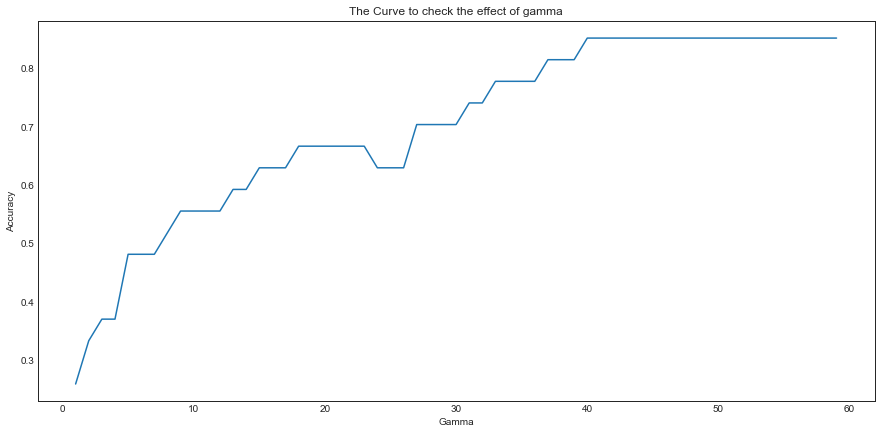

In [24]:
accu = []
for i in range(1,60):
    clf = svm.SVC(C=0.8, kernel='rbf', gamma=i, decision_function_shape='ovr')
    clf.fit(x_train, y_train)
    accu.append(clf.score(x_train, y_train))
    
plt.plot(range(1,60),accu)
plt.title("The Curve to check the effect of gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.show()

In [25]:
print(clf.score(x_test, y_test))
y_hat = clf.predict(x_test)
y_hat

0.25


array([4, 3, 4, 3], dtype=int64)

In [26]:
clf.support_vectors_  # support vectors

array([[0.71794872, 1.        , 0.43956044, 0.49367089],
       [0.72820513, 0.14208145, 0.82197802, 0.29957806],
       [0.68205128, 0.15294118, 0.81758242, 0.5907173 ],
       [0.64102564, 0.17647059, 0.81098901, 0.60759494],
       [0.83589744, 0.08325792, 0.7956044 , 0.69620253],
       [0.84102564, 0.        , 0.83296703, 0.7721519 ],
       [0.68205128, 0.17918552, 0.83956044, 0.74683544],
       [0.75897436, 0.17013575, 0.81318681, 0.76371308],
       [0.6974359 , 0.1800905 , 0.63296703, 0.55274262],
       [0.71282051, 0.21628959, 0.7010989 , 0.47257384],
       [0.68205128, 0.15384615, 0.67692308, 0.67510549],
       [0.72820513, 0.1719457 , 0.76263736, 0.72151899],
       [0.75897436, 0.17918552, 0.81538462, 0.62869198],
       [0.15384615, 0.2361991 , 0.38241758, 0.58649789],
       [0.83076923, 0.18099548, 0.66813187, 0.61181435],
       [0.93333333, 0.19909502, 0.71648352, 0.84388186],
       [0.74358974, 0.21900452, 0.76043956, 0.87341772],
       [0.85128205, 0.17918552,

In [27]:
print(confusion_matrix(y_test,y_hat))

[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]


In [28]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.10      0.20      0.13         4
weighted avg       0.12      0.25      0.17         4



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial

Linear SVC

In [29]:
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train, y_train)

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC()

In [30]:
print(lin_clf.score(x_train, y_train))  # Accuracy
y_hat = lin_clf.predict(x_train)
y_hat

0.5185185185185185


array([3, 3, 1, 3, 4, 4, 3, 3, 6, 3, 3, 4, 4, 1, 4, 4, 3, 3, 6, 6, 4, 3,
       4, 6, 3, 4, 3], dtype=int64)

In [31]:
print(lin_clf.score(x_test, y_test))
y_hat = lin_clf.predict(x_test)
y_hat

0.25


array([4, 3, 4, 4], dtype=int64)

In [32]:
print(confusion_matrix(y_test,y_hat))

[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [33]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.07      0.20      0.10         4
weighted avg       0.08      0.25      0.12         4



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial

Here is comparison of SVM with different kernel function.To check the best one.

Since we need to do the visualization, so we need to choose two features, here we use the the two features that contain the least correlations ,which are forestry and farming, from previously analyzed heatmap. 

And we choose two regions: North region(1) and Southwest Region (5), which are two most distributed groups. 

In [34]:
df_original_c4 = df_original_c3[['Region', 'Forestry.1','Farming.1']]
df_original_c4 = df_original_c4.drop([5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20, 26,27,28,29,30]) # choose two regions
df_original_c4

,Region,Forestry.1,Farming.1
0,1,0.328507,0.000000
1,1,1.000000,0.717949
2,1,0.176471,0.641026
3,1,0.152941,0.682051
4,1,0.142081,0.728205
21,5,0.230769,0.835897
22,5,0.152036,0.835897
23,5,0.205430,0.984615
24,5,0.147511,1.000000
25,5,0.218100,0.892308


In [35]:
X_SVM = df_original_c4[['Farming.1','Forestry.1']].values
X_SVM

array([[0.        , 0.32850679],
       [0.71794872, 1.        ],
       [0.64102564, 0.17647059],
       [0.68205128, 0.15294118],
       [0.72820513, 0.14208145],
       [0.83589744, 0.23076923],
       [0.83589744, 0.1520362 ],
       [0.98461538, 0.20542986],
       [1.        , 0.14751131],
       [0.89230769, 0.21809955]])

In [36]:
y_SVM = df_original_c4[['Region']].values
y_SVM

array([[1],
       [1],
       [1],
       [1],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5]], dtype=int64)

In [37]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
 

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

<Figure size 1080x504 with 0 Axes>

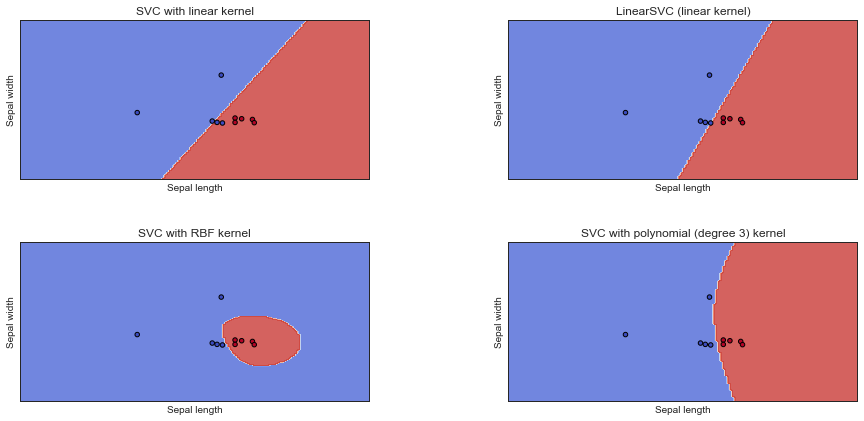

In [38]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 5.0  # SVM regularization parameter
# 惩罚函数，默认值为1，表示对错误分类的惩罚程度，就是不允许分类出错的程度
# C越大，表明越不允许分类出错，但是C越大越可能过拟合，C太小的话趋于0的话，分类将不会关注分类是否正确的问题
models = (svm.SVC(kernel='linear', C=5),
          svm.LinearSVC(C=5),
          svm.SVC(kernel='rbf', gamma=7, C=5),
          svm.SVC(kernel='poly', degree=3, C=5))
# Kernel核函数，引入为了解决线性不可分的问题
# kernel = 'linear', 为线性核，C越大分类效果越好，但可能会过拟合；
# kernel='rbf'时，为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但可能会过拟合；
# kernel='poly'：多项式核；
# kernel=sigmoid’：Sigmoid核函数；kernel=‘precomputed’：核矩阵
models = (clf.fit(X_SVM, y_SVM) for clf in models)
 
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
# Degree：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略
 
# Set-up 2x2 grid for plotting.
plt.figure(1)
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
X0, X1 = X_SVM[:, 0], X_SVM[:, 1]
xx, yy = make_meshgrid(X0, X1)
 
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_SVM, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

C is the penalty function, the default value is 1, which indicates the degree of punishment for error classification, that is, the degree of disallowing error classification.The larger the C is, the less error is allowed. However, the larger the C is, the more over fitting is possible. If the C is too small and tends to zero, the classification will not pay attention to whether the classification is correct.

Kernel ='linear ', which is a linear kernel. The larger the C is, the better the classification effect is, but it may be over fitted;

Kernel = 'rbf', the smaller the gamma value is, the more continuous the classification interface is; The larger the gamma value is, the more "scattered" the classification interface is and the better the classification effect is, but it may be over fitted;

Kernel ='poly ': polynomial kernel;

The kernel 'rbf' perform well in this datasets, but it is a little bit over-fitting, polynomial kernel also does a good job. But we can see that this dataset may not be very good to be linearly divided.

##### 2. The second model is decision tree

In [39]:
clf_Tree = tree.DecisionTreeClassifier()
clf_Tree = clf_Tree.fit(X,y) # Fit the model with data

[Text(345.2625, 353.34, 'X[0] <= 0.736\ngini = 0.824\nsamples = 31\nvalue = [5, 3, 7, 6, 5, 5]'),
 Text(167.4, 298.98, 'X[2] <= 0.787\ngini = 0.579\nsamples = 11\nvalue = [5, 1, 5, 0, 0, 0]'),
 Text(83.7, 244.61999999999998, 'X[1] <= 0.282\ngini = 0.408\nsamples = 7\nvalue = [2, 0, 5, 0, 0, 0]'),
 Text(41.85, 190.26, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0, 0]'),
 Text(125.55000000000001, 190.26, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0]'),
 Text(251.10000000000002, 244.61999999999998, 'X[3] <= 0.677\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0, 0, 0]'),
 Text(209.25, 190.26, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),
 Text(292.95, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(523.125, 298.98, 'X[2] <= 0.765\ngini = 0.765\nsamples = 20\nvalue = [0, 2, 2, 6, 5, 5]'),
 Text(418.5, 244.61999999999998, 'X[3] <= 0.812\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 0, 6, 2, 1]'),
 Text(376.65000000000003, 190.26, 'X[2] <= 0.732\ngini = 

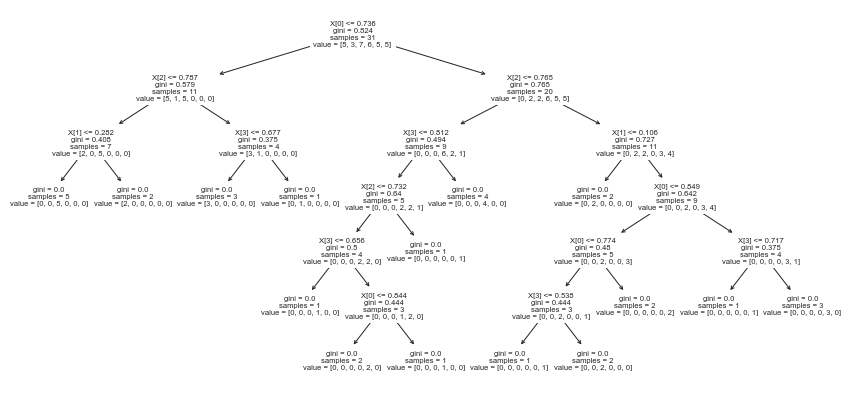

In [40]:
tree.plot_tree(clf_Tree)

The tree above is probably over fitting, we might need to find a proper tree depth.

Here is curve to find the best depth

Max depth 1 Accuracy 0.0
Max depth 2 Accuracy 0.25
Max depth 3 Accuracy 0.5
Max depth 4 Accuracy 0.5
Max depth 5 Accuracy 0.75
Max depth 6 Accuracy 0.5
Max depth 7 Accuracy 0.5


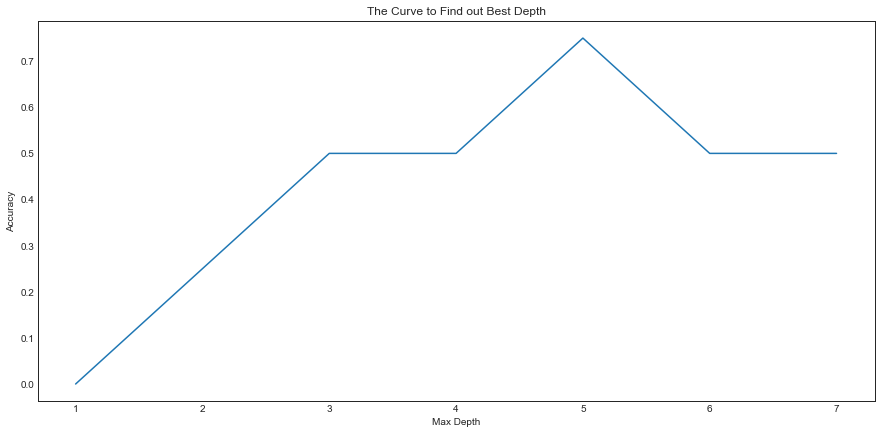

In [41]:
accu = []
for i in range(1,8):
    tree = DecisionTreeClassifier(max_depth = i, random_state=0)
    tree.fit(x_train, y_train)
    accu.append(tree.score(x_test, y_test))
    print("Max depth",i,"Accuracy",tree.score(x_test, y_test))
plt.plot(range(1,8),accu)
plt.title("The Curve to Find out Best Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

So we have the depth which is 5.

In [42]:
tree = DecisionTreeClassifier(max_depth = 5, random_state=2)
tree.fit(x_train, y_train)
print("Accuracy on testing set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on testing set: 0.750


graphviz for two models above

In [43]:
export_graphviz(clf_Tree, 
               out_file="Tree_depthUnlimited.dot",
               class_names=['North','Northeast','East','Central South','Southwest','Northwest'],
               feature_names=['Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1'],
               impurity=False,
               filled=True)
# C:\Users\dcdn\PycharmProjects\Business Analytics Project\Math3970 Applied Machine Learning\Tree_depthUnlimited.dot
# dot -Tpng Tree_depthUnlimited.dot -o Tree_depthUnlimited.png

In [44]:
export_graphviz(tree, 
               out_file="Tree_depth5.dot",
               class_names=['North','Northeast','East','Central South','Southwest','Northwest'],
               feature_names=['Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1'],
               impurity=False,
               filled=True)

##### The third model is KMeans Clustering

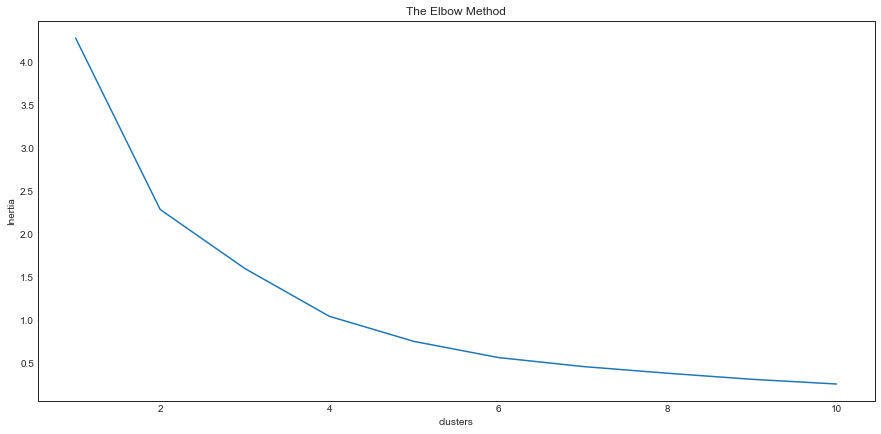

In [45]:
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
#Static code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.show()

We find the best clusters using the elbow method according to the value of inertia.

inertia: evaluation of the model effect index, the sum of the nearest cluster centers of the sample.

In [46]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

Fit model with n_clusters = 6

In [47]:
kmeansmodel = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
y_pred = kmeansmodel.labels_  # y_pred = kmean.predict(X)
y_pred

array([2, 4, 1, 1, 5, 0, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5])

In [48]:
centroid = kmeansmodel.cluster_centers_
centroid

array([[0.85288462, 0.17720588, 0.78557692, 0.79562236],
       [0.71282051, 0.17677225, 0.74725275, 0.6230661 ],
       [0.        , 0.32850679, 0.        , 0.        ],
       [0.15384615, 0.2361991 , 0.38241758, 0.58649789],
       [0.71794872, 1.        , 0.43956044, 0.49367089],
       [0.76410256, 0.19638009, 0.81245421, 0.31364276]])

In [49]:
# Evaluation of the model effect index, the sum of the nearest cluster centers of the sample
inertia = kmeansmodel.inertia_
inertia

0.5630147833376686

In [50]:
# Evaluation of other indicators
y = X[:,1]

# The adjusted Rand index gets a value close to 0 independent of sample size and category through the adjustment of Rand index, 
# and its value range is [- 1,1],
# Negative number means that the result is not good. The closer to 1, the better it is, 
# which means that the clustering result is more consistent with the real situation.
adjusted_rand_s = metrics.adjusted_rand_score(y, y_pred)

# If all clusters only contain data points belonging to members of a single cluster, the clustering results will meet the homogeneity.
# The larger the value range [0,1] means that the clustering results are more consistent with the real situation
homogeneity_s = metrics.homogeneity_score(y, y_pred)

# If all the data points as members of a given class are elements of the same cluster, 
# the clustering results meet the integrity.
# Its value range is [0,1]. The larger the value is, the more consistent the clustering result is with the real situation.
completeness_s = metrics.completeness_score(y, y_pred)

df_metrics = pd.DataFrame([[inertia, adjusted_rand_s, homogeneity_s,completeness_s]],
                         columns=['Inertias','Adjusted Rand Index','Homogeneity','Completeness'])

df_metrics

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


,Inertias,Adjusted Rand Index,Homogeneity,Completeness
0,0.563015,0.016071,0.369694,0.951064


##### The forth model is K-nearest Neighbour

Here we will use standardScalar to tranform to a standardized data

In [51]:
# Original Dataset
df_original_c6 = df_original_c5.copy(deep=True)
df_original_c5.head()

,Region,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,93.7,89.2,121.6,63.5,86.2
1,1,100.6,103.2,195.8,83.5,97.9
2,1,101.9,101.7,104.8,100.4,100.6
3,1,102.0,102.5,102.2,100.7,100.2
4,1,102.1,103.4,101.0,100.9,93.3


In [52]:
# Get features and classes
X_var = df_original_c5[['Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1']].values
y_var = df_original_c5['Region'].values

print(cl('X variable: \n', attrs=['bold']), X_var[:5])
print(cl('y variable: \n', attrs=['bold']), y_var[:5])

X variable: 
 [[ 89.2 121.6  63.5  86.2]
 [103.2 195.8  83.5  97.9]
 [101.7 104.8 100.4 100.6]
 [102.5 102.2 100.7 100.2]
 [103.4 101.  100.9  93.3]]
y variable: 
 [1 1 1 1 1]


In [53]:
X_var = StandardScaler().fit(X_var).transform(X_var.astype(float))
print(cl(X_var[:5],attrs=['bold']))

[[-3.78505648  0.7493968  -4.08587426 -3.16767485]
 [-0.15795444  5.0782831  -1.61730864 -0.78650248]
 [-0.54657252 -0.2307284   0.46862931 -0.23700116]
 [-0.33930955 -0.38241444  0.5056578  -0.31840877]
 [-0.1061387  -0.45242338  0.53034345 -1.72268991]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.15, random_state=4)
print(cl('Train set shape :', attrs=['bold']), X_train.shape, y_train.shape)
print(cl('Test set shape :', attrs=['bold']), X_test.shape, y_test.shape)

Train set shape : (26, 4) (26,)
Test set shape : (5, 4) (5,)


After the accuracy curve, we find the best n_neighbors is 3, here is the training.

In [55]:
k = 3
clf= KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train,y_train)
print(cl(clf, attrs=['bold']))

KNeighborsClassifier(n_neighbors=3)


In [56]:
yhat = clf.predict(X_test)
print(cl('Prediction Accuracy Score (%) :', attrs=['bold']), round(accuracy_score(y_test, yhat)*100, 2))

Prediction Accuracy Score (%) : 80.0


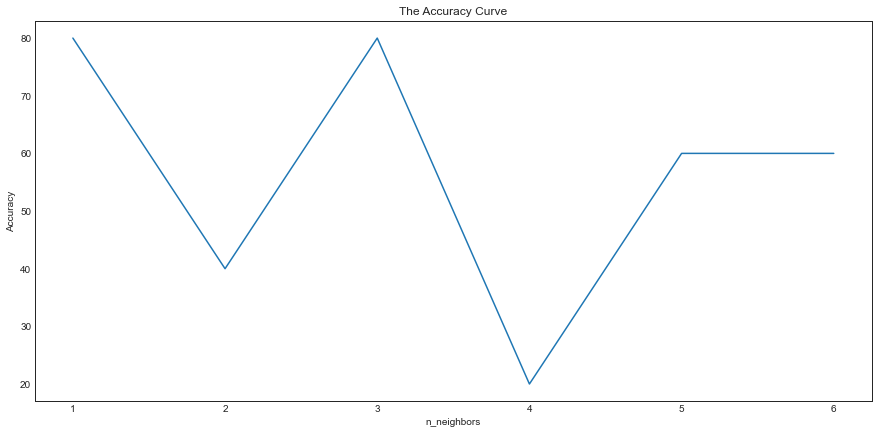

In [57]:
wcss=[]
for i in range(1,7):
    k = i
    clf= KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    yhat = clf.predict(X_test)
    wcss.append(round(accuracy_score(y_test, yhat)*100, 2))
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,7), wcss)
plt.title('The Accuracy Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

From what we have found, under such a model, n_neighbors = 3 would receive best prediction results.

##### The last model is multiple Linear Regression

In [58]:
df_original_c7 = df_original_c6.copy(deep=True)
df_original_c6.head(5)

,Region,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,93.7,89.2,121.6,63.5,86.2
1,1,100.6,103.2,195.8,83.5,97.9
2,1,101.9,101.7,104.8,100.4,100.6
3,1,102.0,102.5,102.2,100.7,100.2
4,1,102.1,103.4,101.0,100.9,93.3


In [59]:
# Get features and classes
X_MLR = df_original_c5[['Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1']].values
y_MLR = df_original_c5['Region'].values

print(cl('X variable: \n', attrs=['bold']), X_MLR[:5])
print(cl('y variable: \n', attrs=['bold']), y_MLR[:5])

X variable: 
 [[ 89.2 121.6  63.5  86.2]
 [103.2 195.8  83.5  97.9]
 [101.7 104.8 100.4 100.6]
 [102.5 102.2 100.7 100.2]
 [103.4 101.  100.9  93.3]]
y variable: 
 [1 1 1 1 1]


Training the model with last four columns as features.

In [60]:
Linear_regress = LinearRegression()
Linear_regress.fit(X_MLR, y_MLR)

LinearRegression()

In [61]:
y_pred = Linear_regress.predict(X_MLR)
y_pred

array([0.63758107, 2.72786926, 2.99264178, 3.19251401, 3.25553962,
       4.19242049, 4.07184988, 3.21273198, 1.25661788, 3.45742935,
       3.42690057, 3.52360682, 3.62085732, 3.53389045, 3.3461215 ,
       4.17748801, 3.687678  , 3.61788636, 4.18954841, 4.55480394,
       4.05007734, 4.05409729, 4.10733226, 4.71432963, 4.71263407,
       3.89810465, 4.23615555, 4.02727624, 3.66847289, 3.24569939,
       3.609844  ])

In [62]:
mean_squared_error(y, y_pred)

12.170984981727194

Add column Indices of Gross Output (preceding year=100)

In [63]:
# Get features and classes
X_MLR = df_original_c5[['Indices of Gross Output (preceding year=100)', 'Farming.1','Forestry.1','Animal Husbandry.1','Fishery.1']].values
y_MLR = df_original_c5['Region'].values

print(cl('X variable: \n', attrs=['bold']), X_MLR[:5])
print(cl('y variable: \n', attrs=['bold']), y_MLR[:5])

X variable: 
 [[ 93.7  89.2 121.6  63.5  86.2]
 [100.6 103.2 195.8  83.5  97.9]
 [101.9 101.7 104.8 100.4 100.6]
 [102.  102.5 102.2 100.7 100.2]
 [102.1 103.4 101.  100.9  93.3]]
y variable: 
 [1 1 1 1 1]


Add column Indices of Gross Output (preceding year=100)

In [64]:
Linear_regress = LinearRegression()
Linear_regress.fit(X_MLR, y_MLR)

LinearRegression()

In [65]:
y_pred = Linear_regress.predict(X_MLR)
y_pred

array([1.77140286, 2.32606446, 2.99859364, 3.04832604, 2.9391889 ,
       3.80042816, 3.43576042, 3.2325876 , 0.30544444, 3.08472048,
       3.53653847, 3.42980559, 3.86074662, 3.48791431, 2.76435369,
       4.15422764, 4.06634298, 3.85199968, 4.25956823, 4.76427718,
       3.84834816, 3.89272423, 3.74708151, 5.06086309, 4.70728528,
       4.9313827 , 4.42830776, 4.44278109, 3.99345717, 3.16346739,
       3.66601024])

In [66]:
mean_squared_error(y, y_pred)

12.349889891875588

Mean squared error： Mean square deviation is the average of the sum of the squares of the distances from the true value of each data.The smaller, the better. 

It is clear that MSE is similar and smaller when we dump Indices of Gross Output (preceding year=100), it means two high relavant variable will silghtly influence the model prediction.

### Model Comparison


From What we have discussed above, we may find that ....

### Modeling after dimension reduction (Principal Component Analysis)
Applying PCA to do the dimension reduction and then do the prediction & visualization

In [67]:
df_original_c7.head(5) 

,Region,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,1,93.7,89.2,121.6,63.5,86.2
1,1,100.6,103.2,195.8,83.5,97.9
2,1,101.9,101.7,104.8,100.4,100.6
3,1,102.0,102.5,102.2,100.7,100.2
4,1,102.1,103.4,101.0,100.9,93.3


In [68]:
X = df_original_c7.iloc[:,2:6]
# First check the variance without dimension reduction
pca = PCA(n_components=4)
pca.fit(X)
print('Explained variance ratio before PCA:', pca.explained_variance_ratio_)
print('Explained variance before PCA:', pca.explained_variance_)

Explained variance ratio before PCA: [0.78188467 0.16853403 0.03953836 0.01004294]
Explained variance before PCA: [321.95416276  69.39671918  16.28058561   4.13534966]


We can see thre ratio of explained variance: 

In [69]:
# specify principal components at least take 95%
pca = PCA(n_components=0.95)
pca.fit(X)
print("At least 95% are principal components: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

At least 95% are principal components: 
[0.78188467 0.16853403]
[321.95416276  69.39671918]
2


In [70]:
# specify principal components at least take 99%
pca = PCA(n_components=0.99)
pca.fit(X)
print("At least 99% are principal components: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

At least 99% are principal components: 
[0.78188467 0.16853403 0.03953836 0.01004294]
[321.95416276  69.39671918  16.28058561   4.13534966]
4


In [71]:
# Let MLE algorithm choose the dimension
pca = PCA(n_components='mle')
pca.fit(X)
print("Let MLE algorithm choose the dimension: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

Let MLE algorithm choose the dimension: 
[0.78188467 0.16853403 0.03953836]
[321.95416276  69.39671918  16.28058561]
3


Explained variance ratio after PCA to two dimensions: [0.78188467 0.16853403]
Explained variance after PCA to two dimensions: [321.95416276  69.39671918]


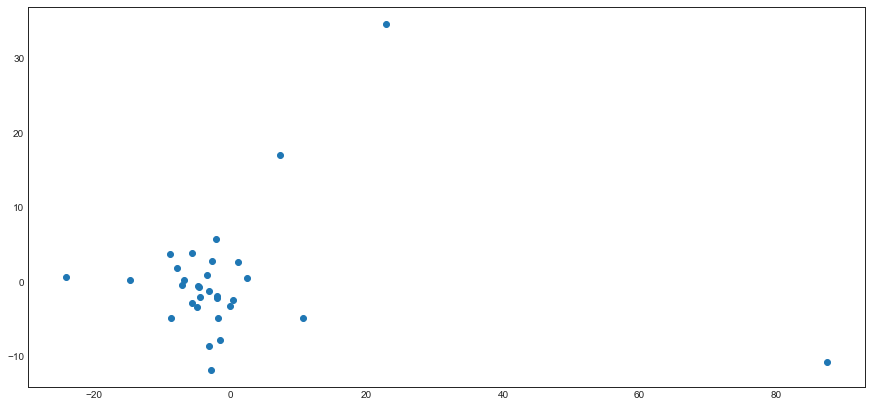

In [72]:
# If we reduce to two dimensions to see its visualization
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance ratio after PCA to two dimensions:', pca.explained_variance_ratio_)
print('Explained variance after PCA to two dimensions:', pca.explained_variance_)
X_2D = pca.transform(X)
plt.scatter(X_2D[:, 0], X_2D[:, 1], marker='o')
plt.show()

In [73]:
# If we reduce to three dimensions to see its visualization
pca = PCA(n_components=3)
pca.fit(X)
print('Explained variance ratio after PCA to three dimensions:', pca.explained_variance_ratio_)
print('Explained variance after PCA to three dimensions:', pca.explained_variance_)
X = X.values

Explained variance ratio after PCA to three dimensions: [0.78188467 0.16853403 0.03953836]
Explained variance after PCA to three dimensions: [321.95416276  69.39671918  16.28058561]


<ipython-input-74-1294993a219f>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)


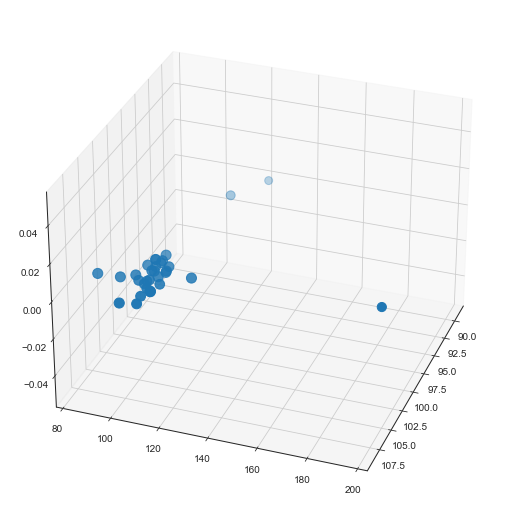

In [74]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

All the figure basically fit the analysis, there are three groups in the three dimensions, and two groups in two dimensions. 

The result why one group is dominated might beacuse explained variance ratio of the firts principal component is dominant.

Prediction with reduced dimensions using K-Nearest Neighbor algorithm, to see if the arruracy score will improve.

In [75]:
# Let MLE algorithm choose the dimension
pca = PCA(n_components='mle')
pca.fit(X)
X_p = pca.fit_transform(X)  # reduce dimension to get X
y = df_original_c7[['Region']].values  # Get y ready
X_p = StandardScaler().fit(X_p).transform(X_p.astype(float)) # Standarize X
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.16, random_state=4)

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array 

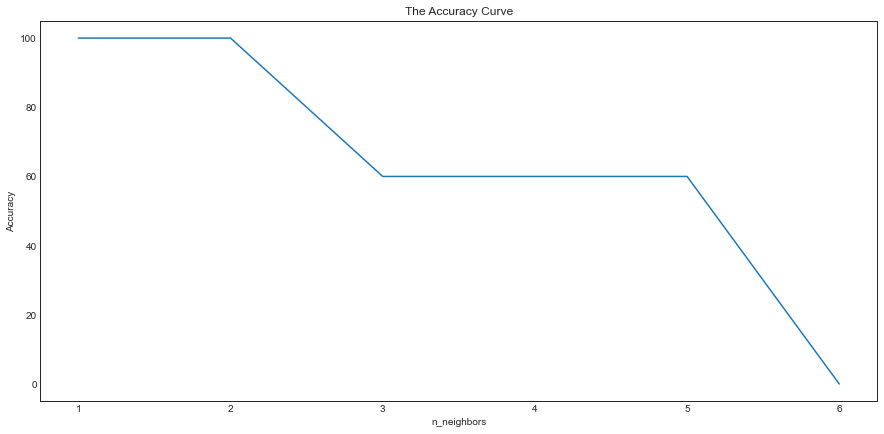

In [76]:
wcss=[]
for i in range(1,7):
    k = i
    clf= KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    yhat = clf.predict(X_test)
    wcss.append(round(accuracy_score(y_test, yhat)*100, 2))
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,7), wcss)
plt.title('The Accuracy Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Area with Soil Erosion under Control

### Improvement